In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('./dataset/ptbdb_abnormal.csv',header=None)
dataset

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
5,0.925265,0.433352,0.073620,0.079197,0.136643,0.182934,0.182934,0.182376,0.196877,0.203569,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
6,0.999144,0.774829,0.522260,0.250856,0.000000,0.066781,0.093322,0.144692,0.154110,0.152397,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
7,1.000000,0.871452,0.678353,0.357262,0.051196,0.000000,0.090707,0.142460,0.138564,0.185309,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
8,1.000000,0.729630,0.583333,0.350926,0.279630,0.321296,0.267593,0.229630,0.218519,0.203704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
9,0.932234,0.810440,0.627595,0.422161,0.263126,0.145910,0.109280,0.088523,0.079976,0.073565,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0


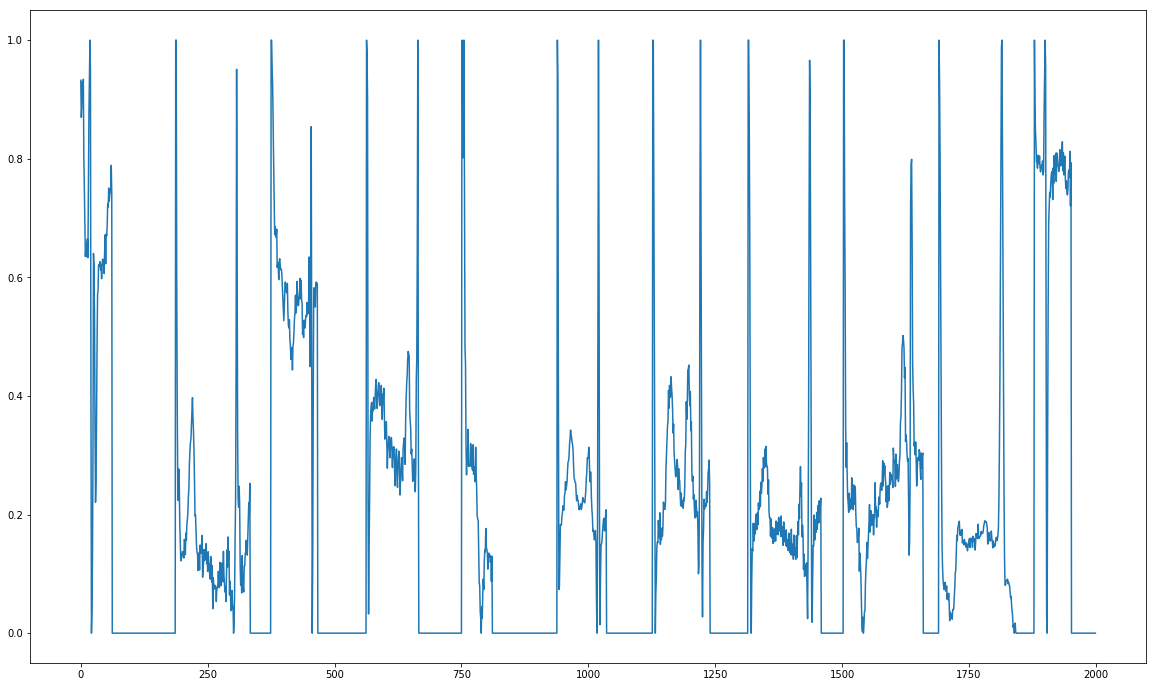

In [3]:
#Visualize first 2000 values
plt.figure(figsize=(20,12))
plt.plot(dataset.iloc[:,:].values.flatten()[:2000])

In [4]:
data = dataset.iloc[:,:].values.flatten()[:50000]
data_len = len(data)
train_len = int(data_len*0.75)
test_len = data_len - train_len
print("Dataset Length: ",data_len)
print("Training set Length: ",train_len)
print("Testing set Length: ",test_len)

Dataset Length:  50000
Training set Length:  37500
Testing set Length:  12500


(37450, 50)


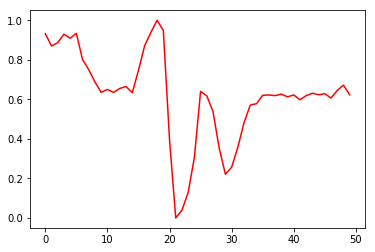

In [5]:
sequence_length = 50
# train data
result = []
for index in range(0, train_len - sequence_length):
    result.append(data[index: index + sequence_length])
result = np.array(result)  #shape(samples, sequence_length)
print(result.shape)
plt.plot(result[0],'r')

0.23200281105786463


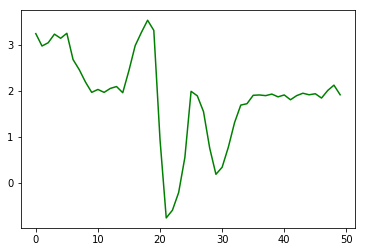

In [6]:
#z_norm
result_mean = result.mean()
result_std = result.std()
print(result_std)
result -= result_mean
result /= result_std
plt.plot(result[0],'g')

In [7]:
print ("Mean of train data : ", result_mean)
print ("Train data shape  : ", result.shape)

train = result[:,:]
np.random.shuffle(train)  # shuffles in-place
X_train = train[:, :-1]
y_train = train[:, -1]
#dropin
print("X shape:", X_train.shape)
print("y shape:",y_train.shape)

X_hat = []
y_hat = []
for i in range(0, len(X_train)):
    for j in range(0, np.random.random_integers(0,20)):
        X_hat.append(X_train[i, :])
        y_hat.append(y_train[i])
X_train, y_train = np.asarray(X_hat), np.asarray(y_hat)
print("X shape:", X_train.shape)
print("y shape:",y_train.shape)

Mean of train data :  0.1789919030987122
Train data shape  :  (37450, 50)
X shape: (37450, 49)
y shape: (37450,)


/home/mgd-pc/.local/lib/python3.5/site-packages/ipykernel/__main__.py:15: DeprecationWarning: This function is deprecated. Please call randint(0, 20 + 1) instead


X shape: (375054, 49)
y shape: (375054,)


In [8]:
# test data

result = []
for index in range(train_len, data_len - sequence_length):
    result.append(data[index: index + sequence_length])
result = np.array(result)  # shape (samples, sequence_length)

#z_norm
result_mean = result.mean()
result_std = result.std()
result -= result_mean
result /= result_std

print ("Mean of test data : ", result_mean)
print ("Test data shape  : ", result.shape)

X_test = result[:, :-1]
y_test = result[:, -1]

print("Shape X_train", np.shape(X_train))
print("Shape X_test", np.shape(X_test))

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Mean of test data :  0.202036770915085
Test data shape  :  (12450, 50)
Shape X_train (375054, 49)
Shape X_test (12450, 49)


In [9]:
model = Sequential()
model.add(LSTM(input_length=sequence_length - 1, input_dim= 1, output_dim= 64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_dim= 1))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="rmsprop")
    
print("Training")
model.fit(X_train, y_train, batch_size=512, nb_epoch=1, validation_split=0.05)

/home/mgd-pc/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  from ipykernel import kernelapp as app
/home/mgd-pc/.local/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=64, return_sequences=True, input_shape=(49, 1))`
  from ipykernel import kernelapp as app
/home/mgd-pc/.local/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
/home/mgd-pc/anaconda3/lib/python3.5/site-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Training
Train on 356301 samples, validate on 18753 samples
Epoch 1/1
356301/356301 [==============================] - 1536s 4ms/step - loss: 0.2249 - val_loss: 0.2236


In [ ]:
print("Predicting")
predicted = model.predict(X_test)
print(X_test.shape)
print("shape of predicted", np.shape(predicted), "size", predicted.size)
print("Reshaping predicted")
predicted = np.reshape(predicted, (predicted.size,))

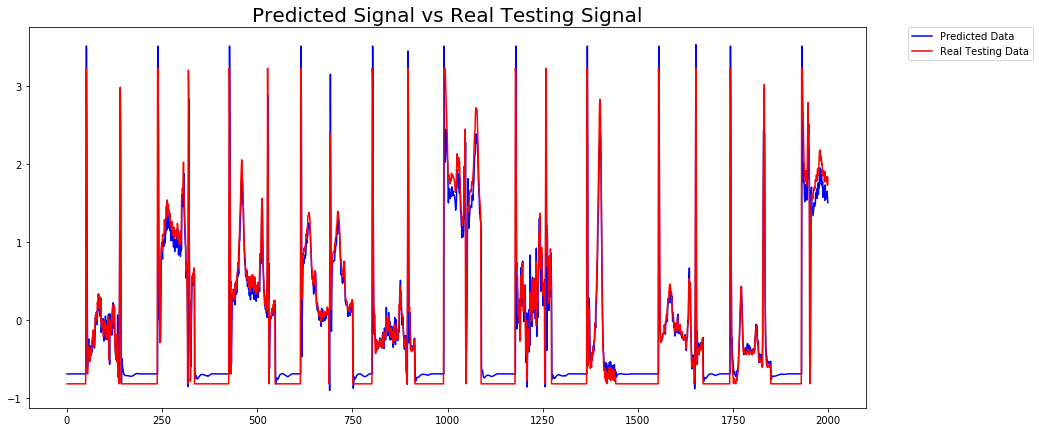

In [12]:
plt.figure()
plt.figure(figsize=(15,7))
plt.title("Predicted Signal vs Real Testing Signal", fontsize=20)
plt.plot(predicted[:2000], 'b', label="Predicted Data")
plt.plot(y_test[:2000], 'r', label="Real Testing Data")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


plt.show()